In [1]:
import sys,os
import tarfile
import warnings

import numpy as np
import pandas as pd
import xarray as xr

import SDFC.link as sdl
import NSSEA as ns
import NSSEA.plot as nsp
import NSSEA.models as nsm
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

import cftime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as mpdf
import matplotlib.patches as mplpatch
from matplotlib.gridspec import GridSpec

from scipy.stats._morestats import _calc_uniform_order_statistic_medians
import matplotlib.ticker as ticker
import seaborn as sns

import pingouin as pg

In [2]:
%run ../Scripts/data_preparation.py
%run ../Scripts/Interest_Quantities.py

In [3]:
custom_params = {"axes.spines.bottom": True,"axes.spines.right": True,"axes.spines.left": True, "axes.spines.top":True}
sns.set_theme(style="whitegrid",rc=custom_params)
#sns.set_context("poster")

sns.set_context("talk")

In [4]:
basepath=os.path.abspath(os.getcwd())
pathInp='/home/barbauxo/Documents/Doctorat/03_Travail/2023_01 Application Tricastin/Data'
#pathOut='../Outputs/Test_2023_02_27'
#pathGCM='/home/barbauxo/Documents/Temporary/Test_2023_02_27'


pathOut='../Outputs/Test_2023_03_24'
pathGCM='/home/barbauxo/Documents/Temporary/Test_2023_03_24'
dt_string="03241230"


assert(os.path.exists(pathInp))
assert(os.path.exists(pathOut))
assert(os.path.exists(pathGCM))
time_period    = np.arange( 1850 , 2101 , 1 , dtype = np.int )
time_reference = np.arange( 1986 , 2016 , 1 , dtype = np.int )
type_data="03_Post_treatment"  #"02_Selected" #"03_Post_treatment" #But no absolute


ci          = 0.05
T=1000
T1=2050
T2=2100
deb=1850
fin=2101

/tmp/ipykernel_13975/1753283675.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_period    = np.arange( 1850 , 2101 , 1 , dtype = np.int )
/tmp/ipykernel_13975/1753283675.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informat

In [5]:
lX,lY,models=load_models_CMIP6(pathInp,type_data)
Xo,Yo=load_obs(pathInp,type_data)

['ACCESS-CM2_i1p1f1', 'ACCESS-ESM1-5_i1p1f1', 'CMCC-ESM2_i1p1f1', 'CNRM-CM6-1-HR_i1p1f2', 'CNRM-CM6-1_i1p1f2', 'CNRM-ESM2-1_i1p1f2', 'CanESM5_i1p2f1', 'EC-Earth3-CC_i1p1f1', 'EC-Earth3-Veg-LR_i1p1f1', 'EC-Earth3-Veg_i1p1f1', 'EC-Earth3_i1p1f1', 'FGOALS-g3_i1p1f1', 'GFDL-ESM4_i1p1f1', 'HadGEM3-GC31-LL_i1p1f3', 'HadGEM3-GC31-MM_i1p1f3', 'INM-CM4-8_i1p1f1', 'INM-CM5-0_i1p1f1', 'IPSL-CM6A-LR_i1p1f1', 'KACE-1-0-G_i1p1f1', 'MIROC-ES2L_i1p1f2', 'MIROC6_i1p1f1', 'MPI-ESM1-2-LR_i1p1f1', 'MRI-ESM2-0_i1p1f1', 'MRI-ESM2-0_i2p1f1', 'NESM3_i1p1f1', 'NorESM2-MM_i1p1f1', 'TaiESM1_i1p1f1', 'UKESM1-0-LL_i1p1f2']


In [6]:
## Reload
##=======
event_name="HW19"
ns_law      = nsm.GEV()

clim,climCXCB = ( ns.Climatology.from_netcdf( os.path.join( pathGCM , ("clim{}_"+dt_string+".nc").format(s) ) , ns_law ) for s in ["","CXCB"] )
params,paramsCXCB = ( xr.open_dataset( os.path.join( pathGCM , ("params{}_"+dt_string+".nc").format(s) ) )["params{}".format(s)] for s in ["","CXCB"] )

#If data before, use file.
#bias=xr.open_dataset( os.path.join( pathGCM , "Bias.nc"))
#bias_multi=bias.__xarray_dataarray_variable__[0].values
bias_multi=36.47666667

In [7]:
i=0
m='Multi_Synthesis'
for i in range(5):
    print(((climCXCB.law_coef) )[:,1:,:].loc[clim.law_coef.coef[i],:,m].median())
#qcoefX[:,:,:].loc["BE",m]

<xarray.DataArray 'law_coef' ()>
array(-0.30661422)
Coordinates:
    model    <U15 'Multi_Synthesis'
    coef     <U4 'loc0'
<xarray.DataArray 'law_coef' ()>
array(1.3605329)
Coordinates:
    model    <U15 'Multi_Synthesis'
    coef     <U4 'loc1'
<xarray.DataArray 'law_coef' ()>
array(0.43534958)
Coordinates:
    model    <U15 'Multi_Synthesis'
    coef     <U6 'scale0'
<xarray.DataArray 'law_coef' ()>
array(0.04321031)
Coordinates:
    model    <U15 'Multi_Synthesis'
    coef     <U6 'scale1'
<xarray.DataArray 'law_coef' ()>
array(-0.22568208)
Coordinates:
    model    <U15 'Multi_Synthesis'
    coef     <U6 'shape0'


In [8]:
pd.DataFrame(climCXCB.X.loc[:,'BE','F'].values, index=[ i for i in range(1850,2101)])

,0
1850,-1.161520
1851,-1.157094
1852,-1.148472
1853,-1.141951
1854,-1.135833
...,...
2096,5.835803
2097,5.916913
2098,5.998110
2099,6.079383


In [9]:
climCXCB.X.loc[:,'BE','F'].values

array([[-1.1615198 ],
       [-1.15709411],
       [-1.14847233],
       [-1.14195084],
       [-1.13583313],
       [-1.13594027],
       [-1.21228833],
       [-1.31311487],
       [-1.32437136],
       [-1.29450121],
       [-1.2559995 ],
       [-1.22145917],
       [-1.21897758],
       [-1.20876228],
       [-1.19183667],
       [-1.17210152],
       [-1.15441847],
       [-1.13932231],
       [-1.12710677],
       [-1.11622635],
       [-1.10890012],
       [-1.09802564],
       [-1.08985778],
       [-1.0865747 ],
       [-1.08228084],
       [-1.07728094],
       [-1.0839323 ],
       [-1.08634208],
       [-1.08380062],
       [-1.07913573],
       [-1.07219805],
       [-1.06327993],
       [-1.05651924],
       [-1.14601132],
       [-1.40704863],
       [-1.4424022 ],
       [-1.41499666],
       [-1.39743215],
       [-1.35313083],
       [-1.33357024],
       [-1.33858728],
       [-1.32140786],
       [-1.28911234],
       [-1.23436625],
       [-1.17833868],
       [-1

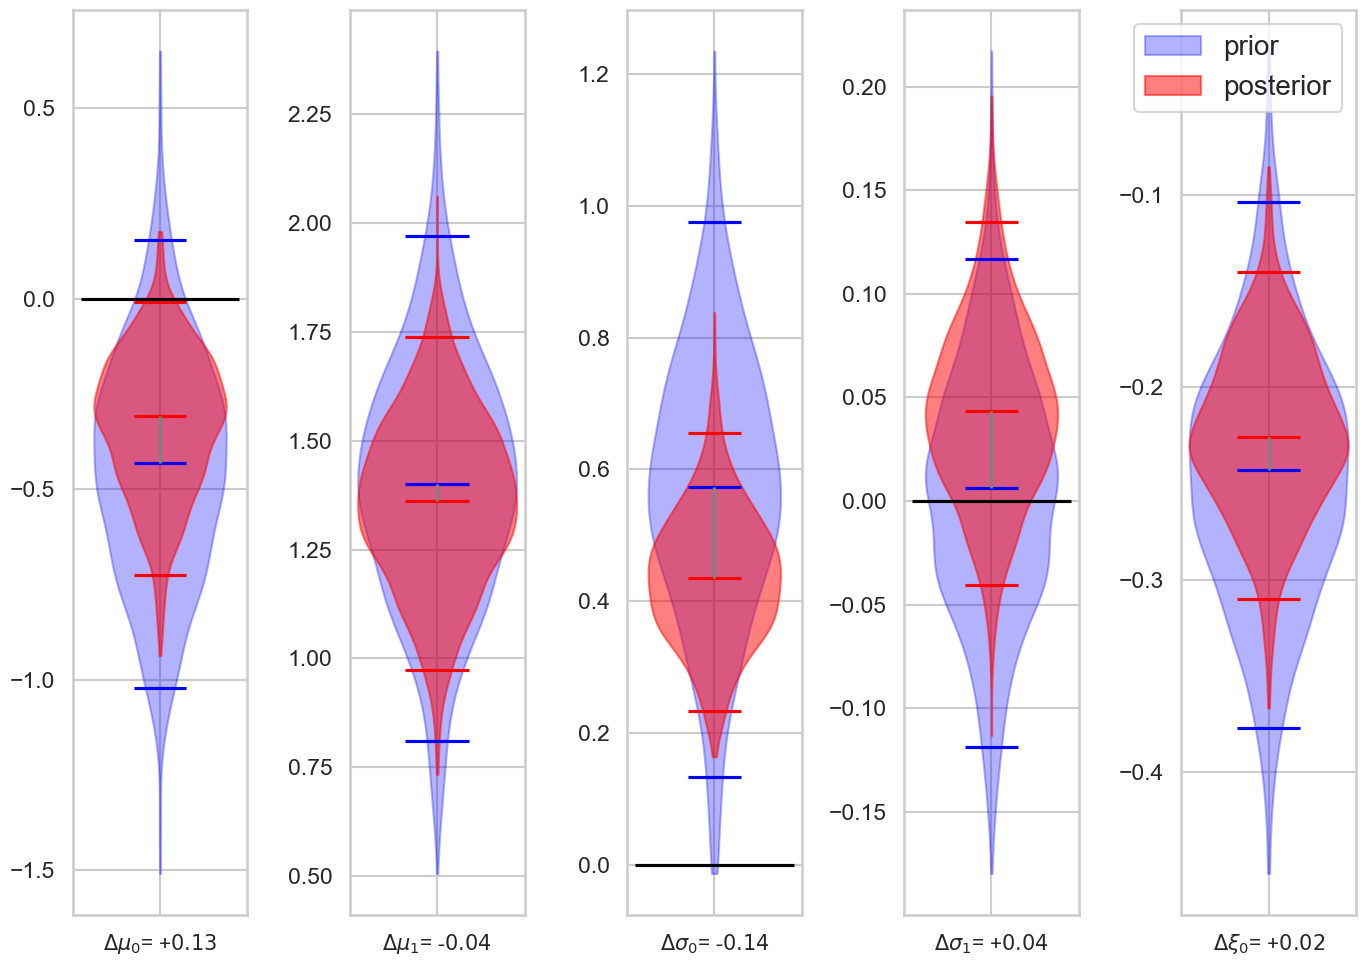

In [10]:
## Quantile

qcoef = clim.law_coef[:,1:,:].quantile( [ci/2,1-ci/2,0.5] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

qcoefX=climCXCB.law_coef[:,1:,:].quantile( [ci/2,1-ci/2,0.5] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )
#if not clim.BE_is_median:
# qcoef.loc["BE",:,:] = clim.law_coef.loc[:,"BE",:]
#qcoef.loc[["ql","qu"],:,:] = qcoef.loc[["ql","qu"],:,:]
## mpl parameter


kwargs = {  "showmeans" : False , "showextrema" : False , "showmedians" : False }
#"positions" : range(clim.n_coef) ,
m='Multi_Synthesis'

fig = plt.figure( figsize = ( 14 , 10 ) )

for i in range(clim.n_coef):

    ax = fig.add_subplot(1,5,i+1)

    ## violin plot
    vplot = ax.violinplot( ((clim.law_coef) )[:,1:,:].loc[clim.law_coef.coef[i],:,m] , **kwargs )
    vplotc = ax.violinplot( ((climCXCB.law_coef) )[:,1:,:].loc[climCXCB.law_coef.coef[i],:,m]  , **kwargs )
    
    for pc in vplotc["bodies"]:
        pc.set_facecolor("red")
        pc.set_edgecolor("red")
        pc.set_alpha(0.5)

    for pc in vplot["bodies"]:
        pc.set_facecolor("blue")
        pc.set_edgecolor("blue")
        pc.set_alpha(0.3)
    
    ## Change color
    #for pc in vplot["bodies"]:
    #    pc.set_facecolor("red")
    #    pc.set_edgecolor("red")
    #    pc.set_alpha(0.5)

    ## add quantiles

    for q in ["ql","qu","BE"]:
        a=ax.hlines( qcoefX[:,i,:].loc[q,m] , 1 - 0.1 , 1 + 0.1 , color = "red", label= "posterior" )
        ax.hlines( qcoef[:,i,:].loc[q,m] , 1 - 0.1 , 1 + 0.1 , color = "blue",label="prior" )
      
    #ax.hlines( 0 , -0.5 , clim.n_coef-0.5 , color = "black" )

    ax.vlines( 1 , qcoefX[:,i,:].loc["BE",m] , qcoef[:,i,:].loc["BE",m] , color = "grey" )

    ## some params
#ax.set_xlim((-0.5,clim.n_coef-0.5))
    ax.set_xticks([1])
    q=qcoefX[:,i,:].loc["BE",m] - qcoef[:,i,:].loc["BE",m] 
    xticks = [ "$\\Delta${}".format(clim.ns_law.get_params_names(True)[i]) + "= {}".format( "+" if np.sign(q) > 0 else "-" ) + r"${}$".format(float(np.sign(q)) * round(float(q),2)) ]
    ax.set_xticklabels( xticks , fontsize = 15 )
    if ((clim.law_coef) )[:,1:,:].loc[clim.law_coef.coef[i],:,m].min()*((clim.law_coef) )[:,1:,:].loc[clim.law_coef.coef[i],:,m].max()<0:
            ax.hlines( 0 , 1-0.3 , 1+0.3, color = "black" )
#for item in ax.get_yticklabels():
        #item.set_fontsize(15)
#ax.set_ylim(ylim)

#ax.set_title( " ".join(m.split("_")) , fontsize = 20 )
ax.legend(["prior","posterior"],fontsize = 20)
fig.set_tight_layout(True)

plt.savefig(os.path.join( pathOut ,dt_string+"_Distribution_parameters_PostBayes.png"))
plt.show()

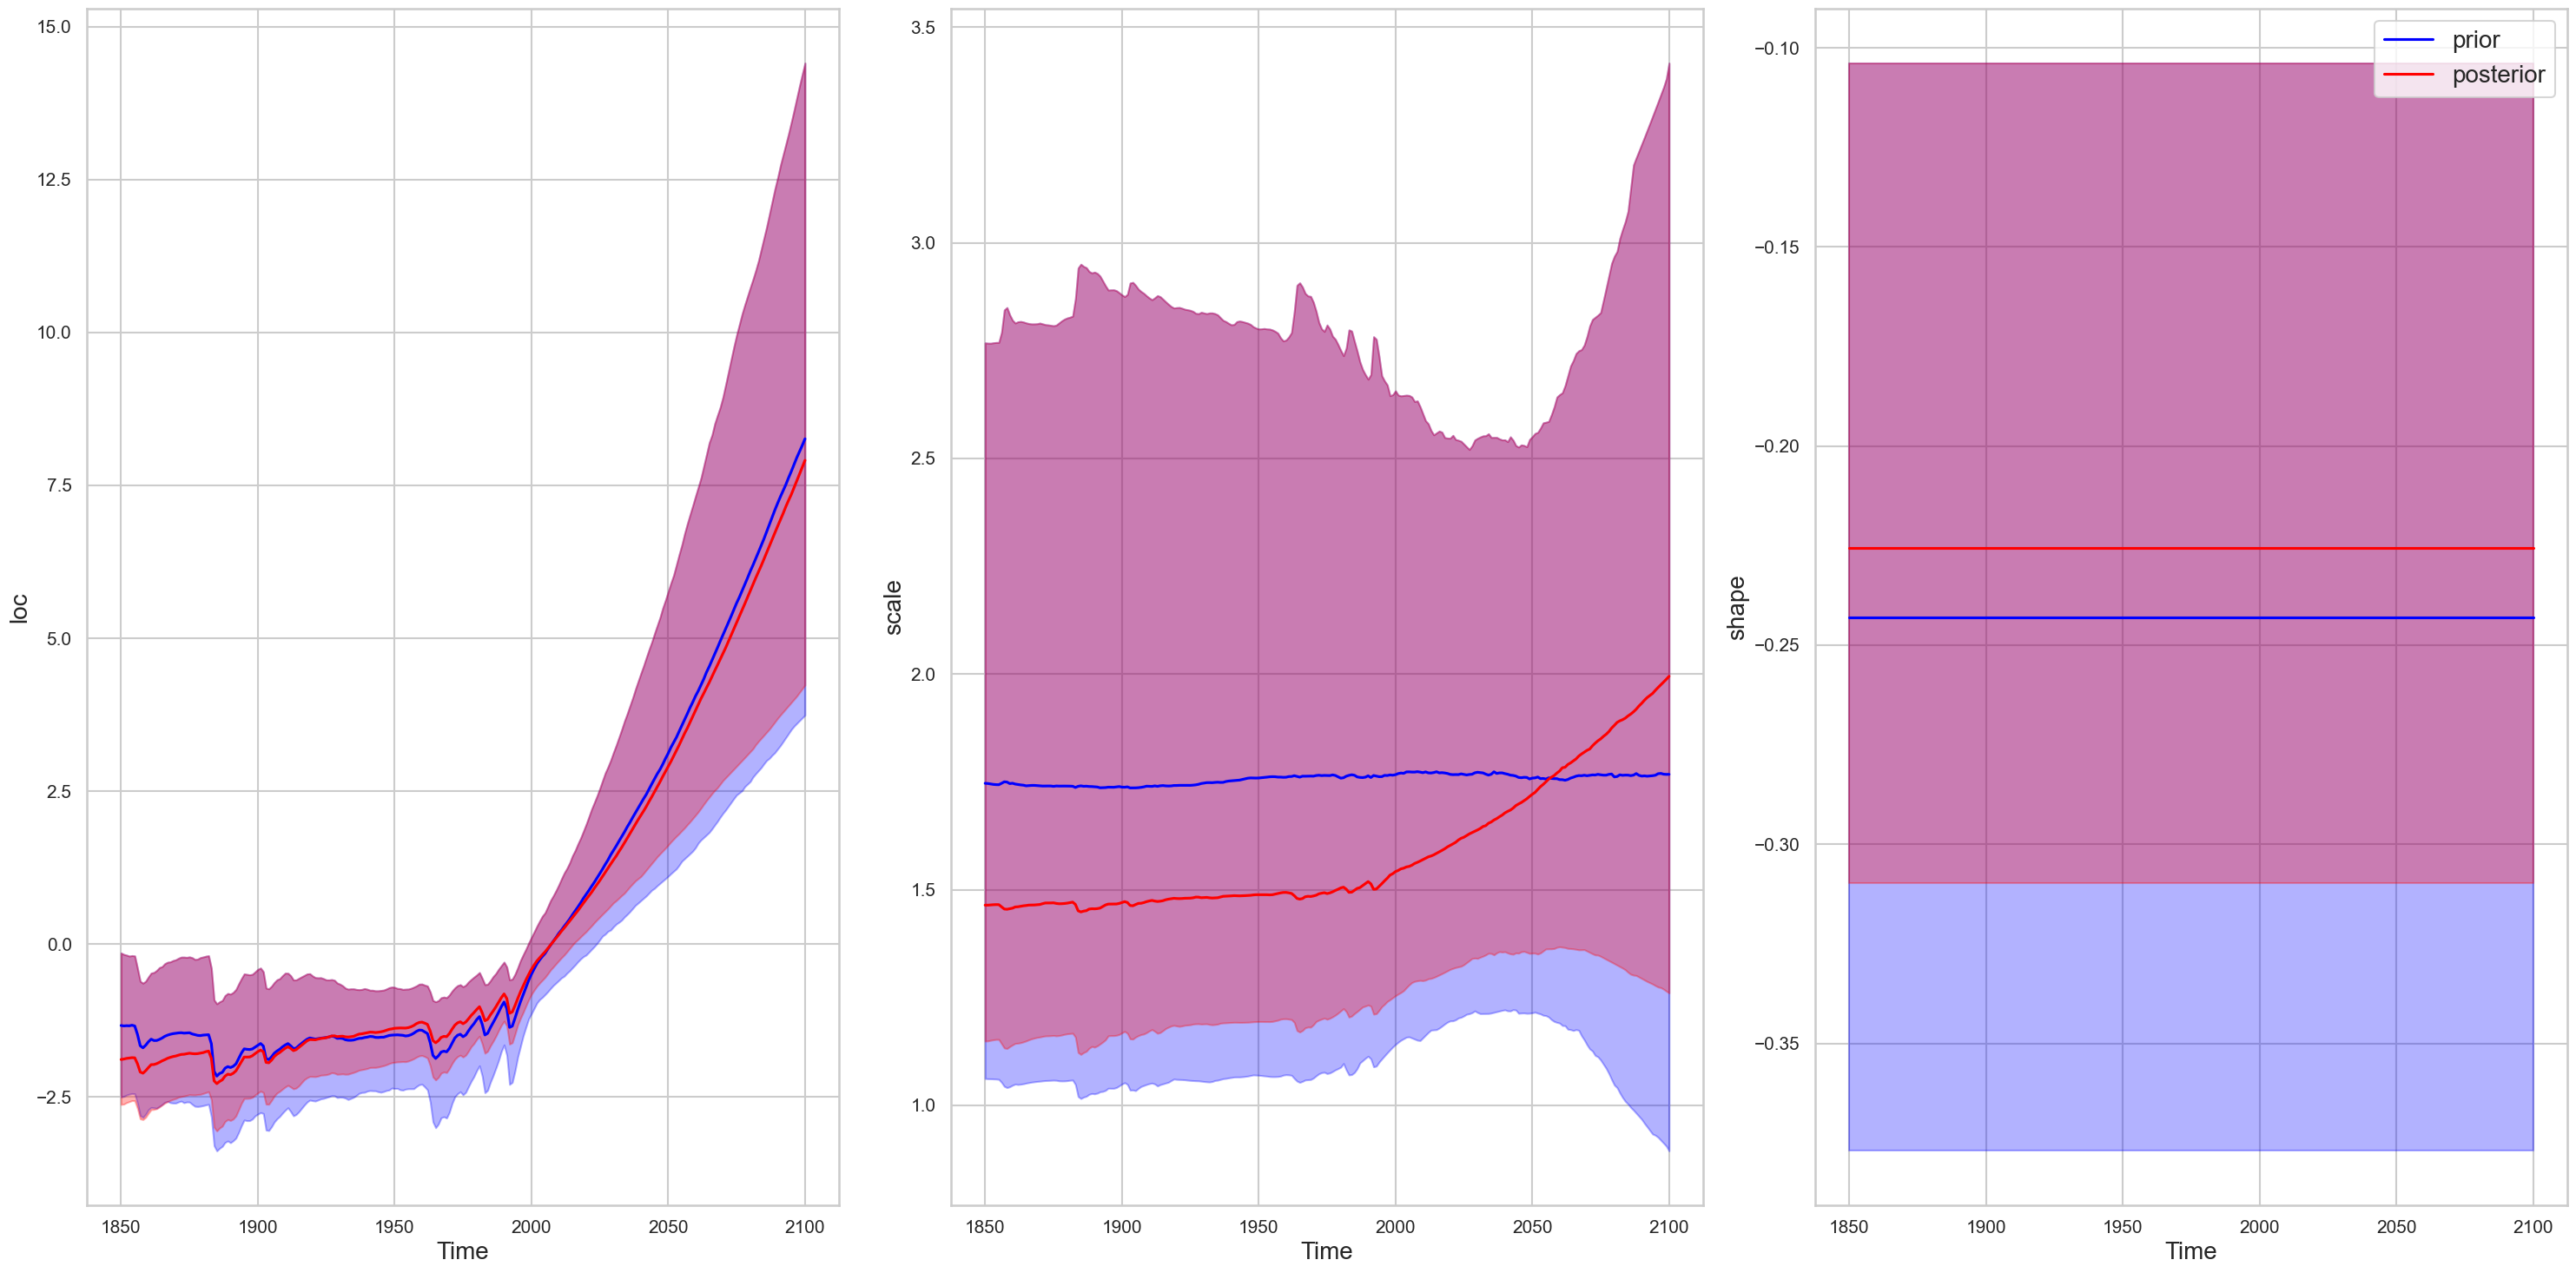

In [11]:
## Quantile
time=time_period
l_params = [k for k in clim.ns_law.lparams]
n_param  = len(l_params)
qparams  = params[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

qparamsX  = paramsCXCB[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )




kwargs = {  "showmeans" : False , "showextrema" : False , "showmedians" : False }
#"positions" : range(clim.n_coef) ,
m='Multi_Synthesis'

fig = plt.figure( figsize = (n_param*10,15) )

for i,p in enumerate(qparams.param):

    ax = fig.add_subplot( 1 , len(l_params) , i + 1 )
    ax.plot( time_period , qparams.loc["BE",time_period,"F",p,m] , color = "blue" )
    ax.fill_between( time , qparams.loc["ql",time,"F",p,m] , qparams.loc["qu",time,"F",p,m] , color = "blue" , alpha = 0.3 )

    ax.plot( time , qparamsX.loc["BE",time,"F",p,m] , color = "red" )
    ax.fill_between( time , qparamsX.loc["ql",time,"F",p,m] , qparams.loc["qu",time,"F",p,m] , color = "red" , alpha = 0.3 )
 


    

    
    ## Change color
    #for pc in vplot["bodies"]:
    #    pc.set_facecolor("red")
    #    pc.set_edgecolor("red")
    #    pc.set_alpha(0.5)

    ## add quantiles
    
    ax.set_ylabel(str(p.values), fontsize = 20 )
    ax.set_xlabel("Time" , fontsize = 20 )
    xticks = [ "$\\Delta${}".format(clim.ns_law.get_params_names(True)[i]) + "= {}".format( "+" if np.sign(q) > 0 else "-" ) + r"${}$".format(float(np.sign(q)) * round(float(q),2)) ]


    for item in ax.get_yticklabels():
        item.set_fontsize(15)
    for item in ax.get_xticklabels():
        item.set_fontsize(15)
#ax.set_ylim(ylim)

#ax.set_title( " ".join(m.split("_")) , fontsize = 20 )
ax.legend(["prior","posterior"],fontsize = 20)

fig.set_tight_layout(True)

plt.savefig(os.path.join( pathOut ,dt_string+"_Evolution_parameters_PostBayes.png"))
plt.show()

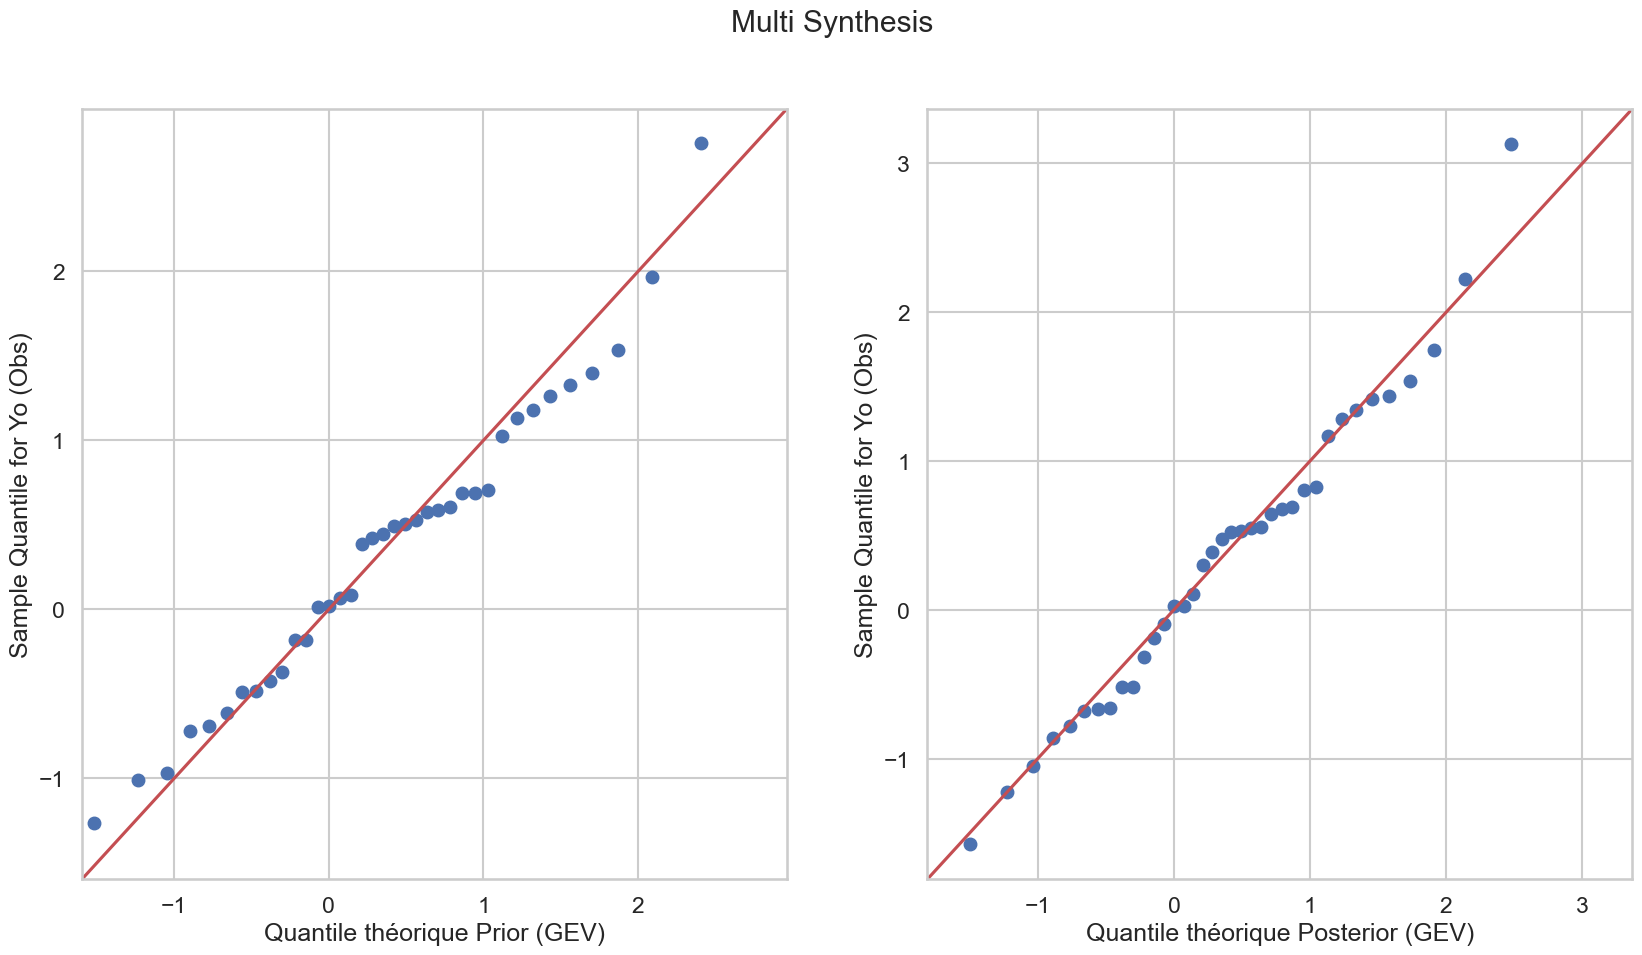

In [12]:
m='Multi_Synthesis'
fig = plt.figure( figsize = (20,10) )
ax = fig.add_subplot( 1 , 2,  1 )
tY    = Yo.index
X     = Xo.loc[tY]
qparamsX  = params[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

#X=X.to_pandas()
residuals=[]
for i in range(0,len(Yo)):
    shape=qparamsX.loc["BE",Yo.index[i],"F",'shape',m].values
    loc=qparamsX.loc["BE",Yo.index[i],"F",'loc',m].values
    scale=qparamsX.loc["BE",Yo.index[i],"F",'scale',m].values
        
    residuals.append(((Yo.iloc[i].values[0]-loc)/scale))

sm.qqplot(np.asarray(residuals),dist=sc.genextreme,distargs=(-shape,), line="45",ax=ax)
ax.set_ylabel("Sample Quantile for Yo (Obs)" )
ax.set_xlabel("Quantile théorique Prior (GEV)" )
fig.suptitle( " ".join(m.split("_"))  )


ax = fig.add_subplot( 1 , 2, 2 )
tY    = Yo.index
X     = Xo.loc[tY]
qparamsX  = paramsCXCB[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

#X=X.to_pandas()
residuals=[]
for i in range(0,len(Yo)):
    shape=qparamsX.loc["BE",Yo.index[i],"F",'shape',m].values
    loc=qparamsX.loc["BE",Yo.index[i],"F",'loc',m].values
    scale=qparamsX.loc["BE",Yo.index[i],"F",'scale',m].values
        
    residuals.append(((Yo.iloc[i].values[0]-loc)/scale))

sm.qqplot(np.asarray(residuals),dist=sc.genextreme,distargs=(-shape,), line="45",ax=ax)
ax.set_ylabel("Sample Quantile for Yo (Obs)" )
ax.set_xlabel("Quantile théorique Posterior (GEV)" )
fig.suptitle( " ".join(m.split("_"))  )

plt.savefig(os.path.join( pathOut ,dt_string+"_QQplot_Obs_PostBayes.png"))
plt.show()

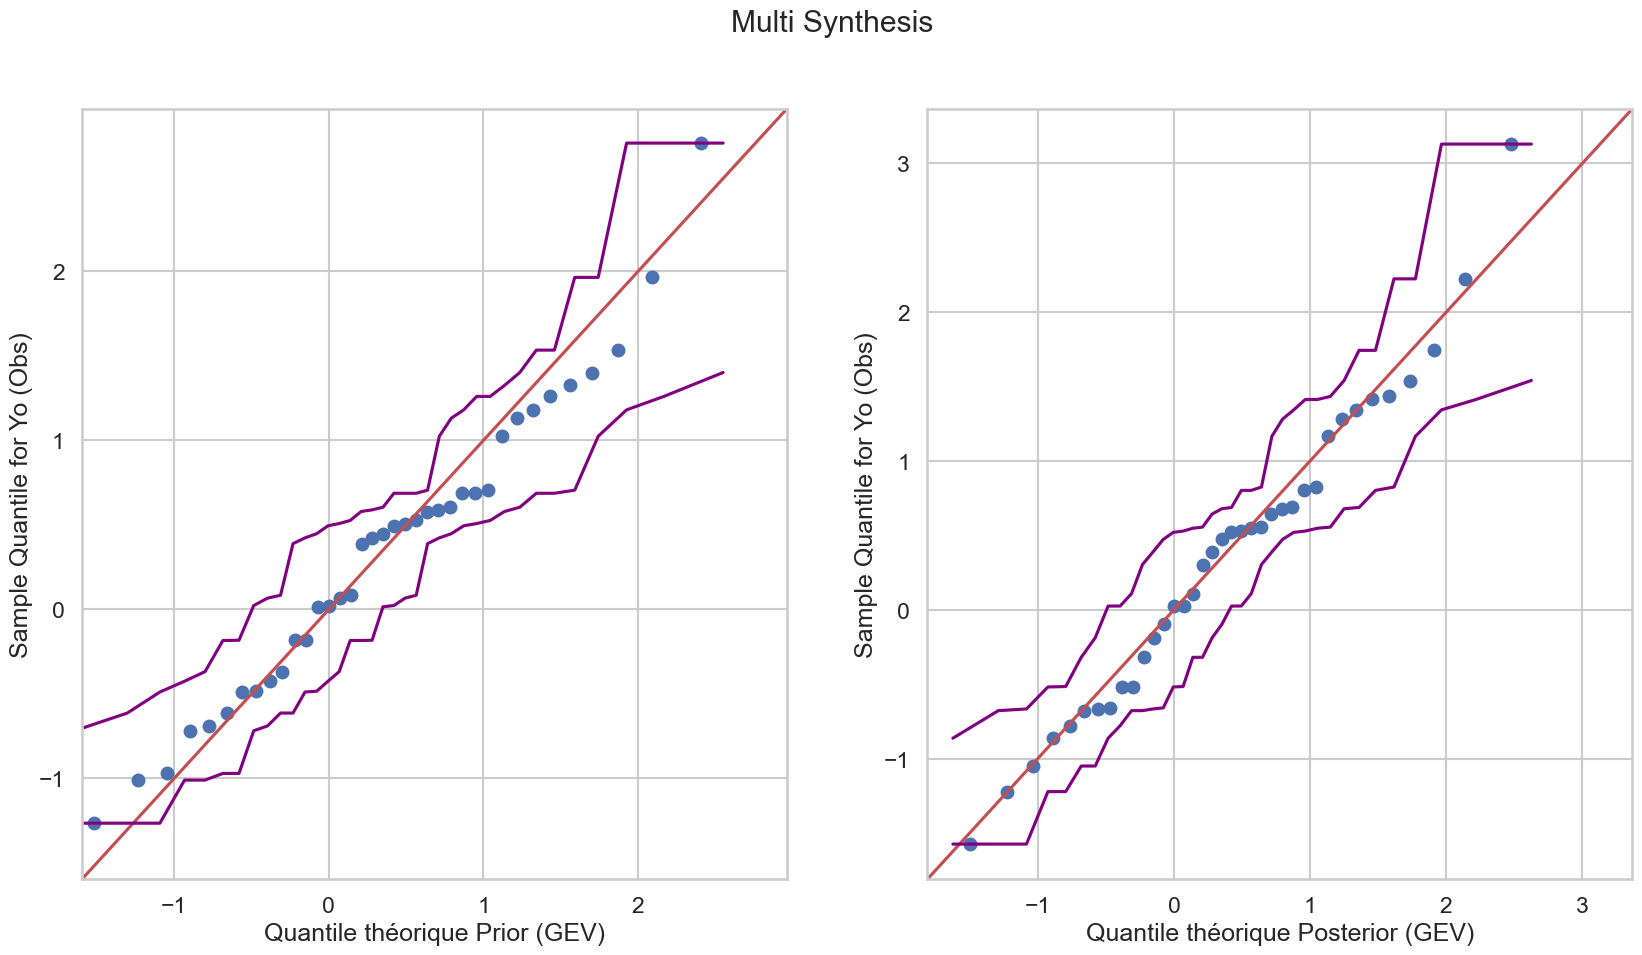

In [13]:
m='Multi_Synthesis'
fig = plt.figure( figsize = (20,10) )
ax = fig.add_subplot( 1 , 2,  1 )
tY    = Yo.index
X     = Xo.loc[tY]
qparamsX  = params[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

#X=X.to_pandas()
residuals=[]
for i in range(0,len(Yo)):
    shape=qparamsX.loc["BE",Yo.index[i],"F",'shape',m].values
    loc=qparamsX.loc["BE",Yo.index[i],"F",'loc',m].values
    scale=qparamsX.loc["BE",Yo.index[i],"F",'scale',m].values
        
    residuals.append(((Yo.iloc[i].values[0]-loc)/scale))

sm.qqplot(np.asarray(residuals),dist=sc.genextreme,distargs=(-shape,), line="45",ax=ax)
ax.set_ylabel("Sample Quantile for Yo (Obs)" )
ax.set_xlabel("Quantile théorique Prior (GEV)" )



tirages=10000
dist=sc.genextreme
sparams=(-shape,)
osm_uniform = _calc_uniform_order_statistic_medians(len(residuals))
osm = dist.ppf(osm_uniform, *sparams)
OSR=np.zeros(shape=(tirages, len(residuals)))
for s in range(0,tirages):
    idx = np.random.choice( len(residuals), len(residuals) , replace = True )

    x_s= np.asarray(residuals)[idx]
    OSR[s] = np.sort(x_s)
    
    
qu=np.quantile(OSR,1-ci / 2,axis=0)
ql=np.quantile(OSR,ci / 2,axis=0)
ax.plot(osm, qu,color="purple")
ax.plot(osm, ql,color="purple")

fig.suptitle( " ".join(m.split("_"))  )


ax = fig.add_subplot( 1 , 2, 2 )
tY    = Yo.index
X     = Xo.loc[tY]
qparamsX  = paramsCXCB[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

#X=X.to_pandas()
residuals=[]
for i in range(0,len(Yo)):
    shape=qparamsX.loc["BE",Yo.index[i],"F",'shape',m].values
    loc=qparamsX.loc["BE",Yo.index[i],"F",'loc',m].values
    scale=qparamsX.loc["BE",Yo.index[i],"F",'scale',m].values
        
    residuals.append(((Yo.iloc[i].values[0]-loc)/scale))

sm.qqplot(np.asarray(residuals),dist=sc.genextreme,distargs=(-shape,), line="45",ax=ax)
ax.set_ylabel("Sample Quantile for Yo (Obs)" )
ax.set_xlabel("Quantile théorique Posterior (GEV)" )

tirages=10000
dist=sc.genextreme
sparams=(-shape,)
osm_uniform = _calc_uniform_order_statistic_medians(len(residuals))
osm = dist.ppf(osm_uniform, *sparams)
OSR=np.zeros(shape=(tirages, len(residuals)))
for s in range(0,tirages):
    idx = np.random.choice( len(residuals), len(residuals) , replace = True )

    x_s= np.asarray(residuals)[idx]
    OSR[s] = np.sort(x_s)
    
    
qu=np.quantile(OSR,1-ci / 2,axis=0)
ql=np.quantile(OSR,ci / 2,axis=0)
ax.plot(osm, qu,color="purple")
ax.plot(osm, ql,color="purple")

fig.suptitle( " ".join(m.split("_"))  )

plt.savefig(os.path.join( pathOut ,dt_string+"_QQplot_Obs_PostBayes_ICBoostrap.png"))
plt.show()

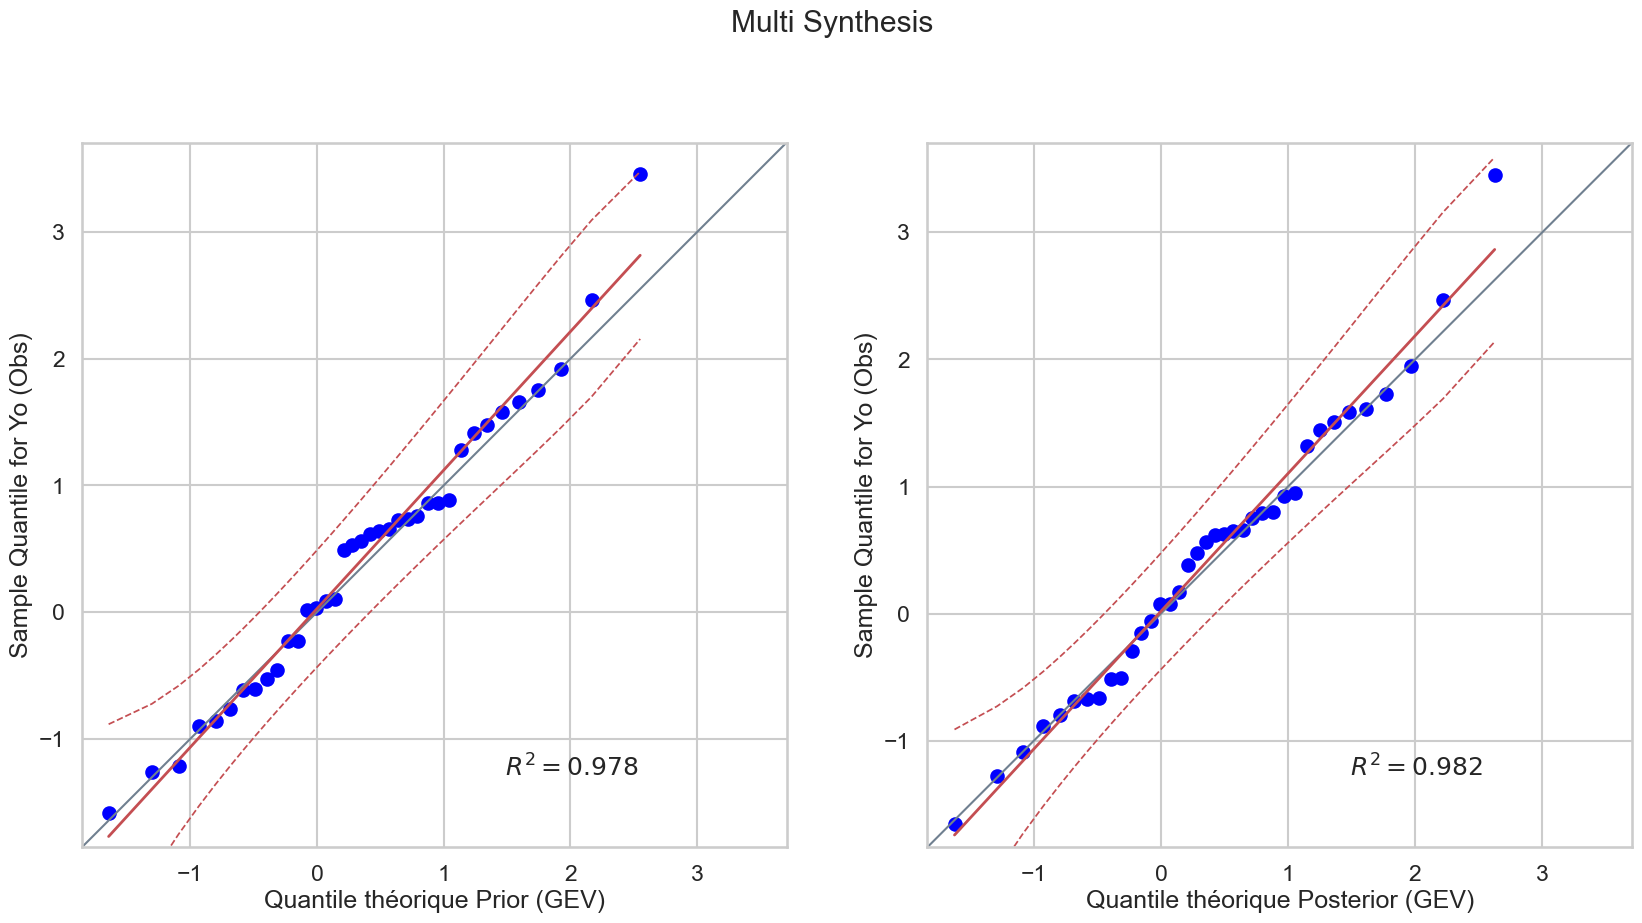

In [14]:
m='Multi_Synthesis'
fig = plt.figure( figsize = (20,10) )
ax = fig.add_subplot( 1 , 2,  1 )
tY    = Yo.index
X     = Xo.loc[tY]
qparamsX  = params[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

#X=X.to_pandas()
residuals=[]
for i in range(0,len(Yo)):
    shape=qparamsX.loc["BE",Yo.index[i],"F",'shape',m].values
    loc=qparamsX.loc["BE",Yo.index[i],"F",'loc',m].values
    scale=qparamsX.loc["BE",Yo.index[i],"F",'scale',m].values
        
    residuals.append(((Yo.iloc[i].values[0]-loc)/scale))

ax = pg.qqplot(np.asarray(residuals),dist=sc.genextreme,sparams=(-shape,), confidence=.95)
ax.set_ylabel("Sample Quantile for Yo (Obs)" )
ax.set_xlabel("Quantile théorique Prior (GEV)" )
fig.suptitle( " ".join(m.split("_"))  )


ax = fig.add_subplot( 1 , 2, 2 )
tY    = Yo.index
X     = Xo.loc[tY]
qparamsX  = paramsCXCB[:,1:,:,:,:].quantile( [ ci / 2 , 1 - ci / 2 , 0.5 ] , dim = "sample" ).assign_coords( quantile = ["ql","qu","BE"] )

#X=X.to_pandas()
residuals=[]
for i in range(0,len(Yo)):
    shape=qparamsX.loc["BE",Yo.index[i],"F",'shape',m].values
    loc=qparamsX.loc["BE",Yo.index[i],"F",'loc',m].values
    scale=qparamsX.loc["BE",Yo.index[i],"F",'scale',m].values
        
    residuals.append(((Yo.iloc[i].values[0]-loc)/scale))

ax = pg.qqplot(np.asarray(residuals),dist=sc.genextreme,sparams=(-shape,), confidence=.95)
ax.set_ylabel("Sample Quantile for Yo (Obs)" )
ax.set_xlabel("Quantile théorique Posterior (GEV)" )
fig.suptitle( " ".join(m.split("_"))  )

plt.savefig(os.path.join( pathOut ,dt_string+"_QQplot_Obs_PostBayes_ICPingouin.png"))
plt.show()

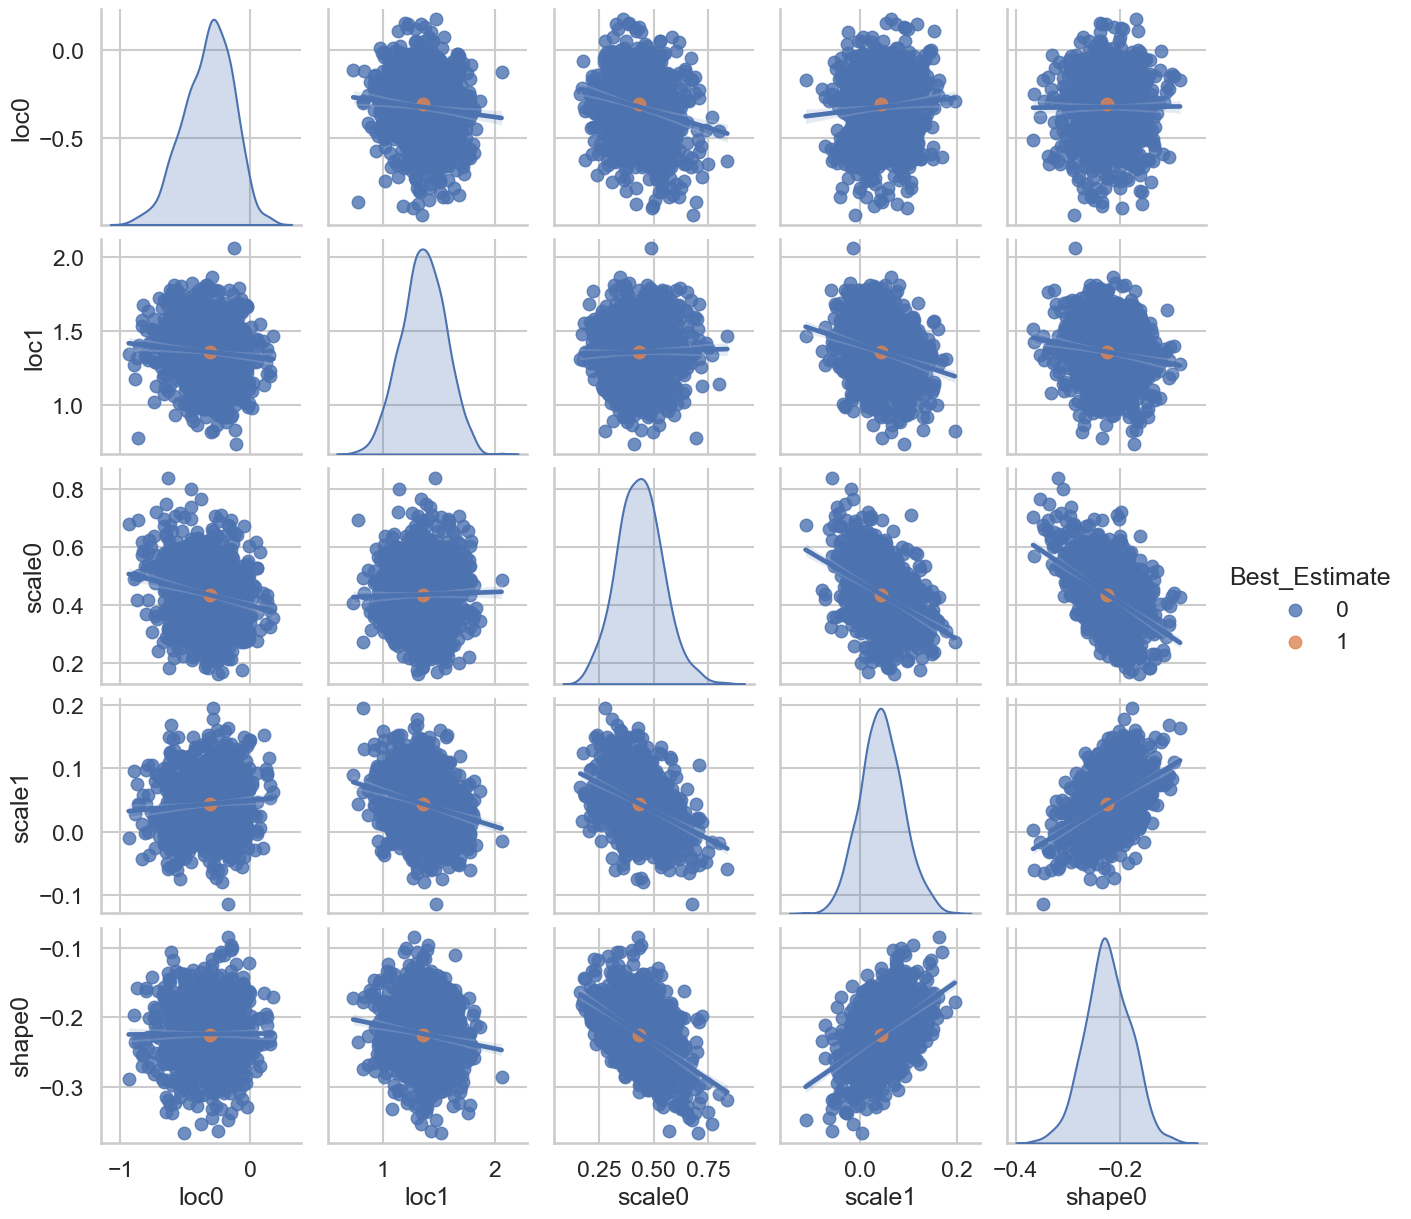

In [15]:
all_s=climCXCB.law_coef[:,1:,0].assign_coords( quantile = "BE" ).to_pandas().T
all_s['Best_Estimate']=0
be=climCXCB.law_coef[:,1:,:].quantile( 0.5 , dim = "sample" ).assign_coords( quantile = "BE" ).to_pandas().T
be['Best_Estimate']=1
total=pd.concat([all_s,be])

sns.pairplot(
    total ,hue='Best_Estimate',
     kind='reg'
)
plt.savefig(os.path.join( pathOut ,dt_string+"_Parameters_Correlations_PostBayes.png"))
plt.show(block=False)

In [28]:
T=100
#T=1000

In [29]:
#%run ../Scripts/data_preparation.py
#%run ../Scripts/Interest_Quantities.py

# EQR

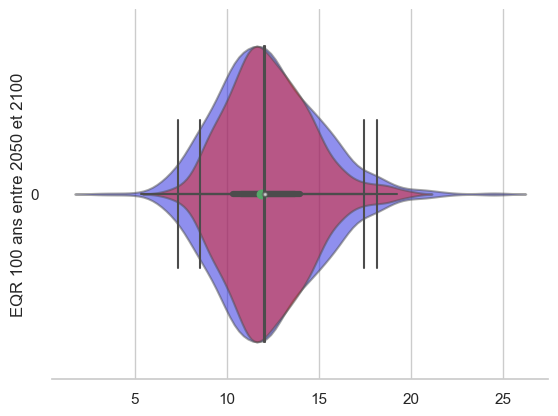

In [30]:
#EQR
m='Multi_Synthesis'
Ql_EQR,Qm_EQR,EQR_BE ,P_BE,EQR,Qu_EQR,EQR_S,EQR_P=Find_EQR_IC(m,params,T,T1,T2,ci,xlen=10000)
fig = plt.figure()
ax=sns.violinplot(EQR_S,orient="h",color = "blue"  )
plt.setp(ax.collections, alpha=.3)
sns.boxplot(EQR_S, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(EQR_BE, 0,'go' )
ax.set_ylabel("EQR " +str(T)+ " ans entre " + str(T1)+ " et "+str(T2))
#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()
Ql_EQR_post,Qm_EQR_post,EQR_BE_post ,P_BE_post,EQR_post,Qu_EQR_post,EQR_S_post,EQR_P_post=Find_EQR_IC(m,paramsCXCB,T,T1,T2,ci,xlen=10000)

ax=sns.violinplot(EQR_S_post,orient="h",color = "red"  )
plt.setp(ax.collections, alpha=.5)
sns.boxplot(EQR_S_post, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(EQR_BE_post, 0,'go' )

#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()

plt.savefig(os.path.join( pathOut ,dt_string+"_EQR_" +str(T)+"ans_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))
plt.show()

In [31]:
m='Multi_Synthesis'

with open(os.path.join( pathOut ,dt_string+"_EQR_" +str(T)+"ans_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.txt"), 'w') as f:
    a="Anomaly: for Prior, EQR BE is " + str(round(EQR_BE,2))+" with ic " + str(ci)+" at ["+str(round(Ql_EQR,2))+ ","+str(round(Qu_EQR,2))+"] with median at "+str(round(Qm_EQR,2))+"\n"
    print(a)
    f.write(a)
    a="Anomaly: for Posterior, EQR BE is " + str(round(EQR_BE_post,2))+" with ic " + str(ci)+" at ["+str(round(Ql_EQR_post,2))+ ","+str(round(Qu_EQR_post,2))+"] with median at "+str(round(Qm_EQR_post,2))+"\n"
    print(a)
    f.write(a)
    a="Absolute: for Prior, EQR BE is " + str(round(bias_multi+EQR_BE,2))+"°C with ic " + str(ci)+" at ["+str(round(bias_multi+Ql_EQR,2))+ ","+str(round(bias_multi+Qu_EQR,2))+"] with median at "+str(round(bias_multi+Qm_EQR,2)) +"\n"
    print(a)
    f.write(a)
    a="Absolute: for Posterior, EQR BE is " + str(round(bias_multi+EQR_BE_post,2))+"°C with ic " + str(ci)+" at ["+str(round(bias_multi+Ql_EQR_post,2))+ ","+str(round(bias_multi+Qu_EQR_post,2))+"] with median at "+str(round(bias_multi+Qm_EQR_post,2))+"\n"
    print(a)
    f.write(a)

Anomaly: for Prior, EQR BE is 11.96 with ic 0.05 at [7.34,18.13] with median at 11.98

Anomaly: for Posterior, EQR BE is 11.87 with ic 0.05 at [8.51,17.43] with median at 12.05

Absolute: for Prior, EQR BE is 48.44°C with ic 0.05 at [43.82,54.61] with median at 48.46

Absolute: for Posterior, EQR BE is 48.35°C with ic 0.05 at [44.99,53.91] with median at 48.53



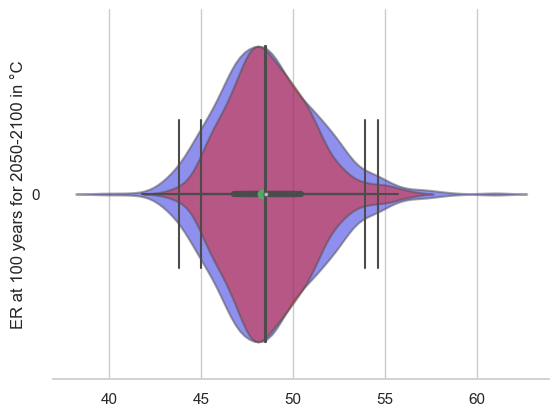

In [32]:
#EQR
custom_params = {"axes.spines.bottom": True,"axes.spines.right": False,"axes.spines.left": False, "axes.spines.top":False}
sns.set_theme(style="whitegrid",rc=custom_params)
#
#m='Multi_Synthesis'
#Ql_EQR,Qm_EQR,EQR_BE ,P_BE,EQR,Qu_EQR,EQR_S,EQR_P=Find_EQR_IC(m,params,T,T1,T2,ci,xlen=10000)
fig = plt.figure()
ax=sns.violinplot(EQR_S+bias_multi,orient="h",color = "blue",label="prior"  )
plt.setp(ax.collections, alpha=.3)
sns.boxplot(EQR_S+bias_multi, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(EQR_BE+bias_multi, 0,'go' )
ax.set_ylabel("ER at " +str(T)+ " years for " + str(T1)+ "-"+str(T2)+ " in °C")
#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()
#Ql_EQR_post,Qm_EQR_post,EQR_BE_post ,P_BE_post,EQR_post,Qu_EQR_post,EQR_S_post,EQR_P_post=Find_EQR_IC(m,paramsCXCB,T,T1,T2,ci,xlen=10000)

ax=sns.violinplot(EQR_S_post+bias_multi,orient="h",color = "red" ,label="Posterior" )
plt.setp(ax.collections, alpha=.5)
sns.boxplot(EQR_S_post+bias_multi, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h',boxprops={"facecolor": (.4, .6, .8, .5)})
plt.plot(EQR_BE_post+bias_multi, 0,'go' )


#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()

plt.savefig(os.path.join( pathOut ,dt_string+"_EQR_bias_" +str(T)+"ans_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))
plt.show()

In [33]:
from matplotlib.ticker import FormatStrFormatter

In [34]:
test={"Temperature":EQR_S_post+bias_multi, "Distribution":"Posterior"}
test2={"Temperature":EQR_S+bias_multi, "Distribution":"Prior"}
full_EQR=pd.concat([pd.DataFrame(data=test),pd.DataFrame(data=test2)],ignore_index=True)

In [35]:
full_EQR[" "] = ""
full_EQR

,Temperature,Distribution,
0,47.377971,Posterior,
1,56.343230,Posterior,
2,45.084837,Posterior,
3,47.740296,Posterior,
4,49.845948,Posterior,
...,...,...,...
1995,43.541135,Prior,
1996,55.249527,Prior,
1997,48.968869,Prior,
1998,45.883062,Prior,


In [118]:
sns.set_context("poster")

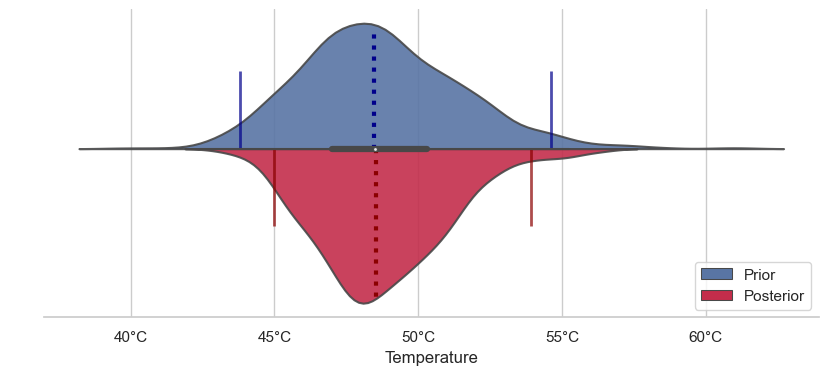

In [38]:
fig, ax = plt.subplots(figsize=(10,4))
ax=sns.violinplot(data=full_EQR, x="Temperature",y=' ',hue="Distribution",hue_order=["Prior","Posterior"] ,palette={"Prior": "b", "Posterior": "crimson"},
               split=True, orient="h")
plt.setp(ax.collections, alpha=.9)
ax.vlines(bias_multi+Qu_EQR,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+Ql_EQR,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+Qm_EQR,0,-0.31 , colors='darkblue',linewidth=3,linestyle='dotted')

ax.vlines(bias_multi+Qm_EQR_post,0,0.4 , colors='darkred',linewidth=3,linestyle='dotted')
ax.vlines(bias_multi+Ql_EQR_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+Qu_EQR_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)

#ax.set_xlabel("ER at " +str(T)+ " years for " + str(T1)+ "-"+str(T2))
sns.despine(left=True,right=True)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0))
#plt.title("ER at " +str(T)+ " years for " + str(T1)+ "-"+str(T2))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°C'))
plt.legend(loc='lower right')
plt.savefig(os.path.join( pathOut ,dt_string+"_EQR_bias_Poster" +str(T)+"ans_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))
plt.show()
#plt.clf()

In [37]:
bias_multi+Qm_EQR,bias_multi+Qm_EQR_post

(48.45854780023522, 48.53161535005363)

In [27]:
str(round(bias_multi+Qm_EQR_post,2))

'50.26'

# Return Level

In [121]:
def Find_RL_IC(m,params,T,T1,ci,xlen=1000): #T1= date of RL
    para_s=params.loc[:,'BE','F',:,m] #BE
    #params[:,1:,:,:,:].loc[:,:,'F',:,m][:,s,:] #qUANTILE
    RL_val=sc.genextreme.ppf((1-1/T), -para_s.loc[T1,'shape'].values,para_s.loc[T1,'loc'].values,para_s.loc[T1,'scale'].values)

    RL_S=np.zeros( len(params.sample)-1)
    
    
    for i in range(0,len(params.sample)-1):
        
        para_s= params[:,1:,:,:,:].loc[:,:,'F',:,m][:,i,:] #qUANTILE
        RL_S[i]=sc.genextreme.ppf((1-1/T), -para_s.loc[T1,'shape'].values,para_s.loc[T1,'loc'].values,para_s.loc[T1,'scale'].values)
        
       
        
    return np.quantile(RL_S,ci / 2),np.median(RL_S),RL_val ,np.quantile(RL_S,1-ci / 2),RL_S

## 2050

In [122]:
#T=100
#T=1000

In [123]:
T_RL=2050
RL_2050_l,RL_2050_m,RL_2050_BE ,RL_2050_u,RL_2050=Find_RL_IC(m,params,T,T_RL,ci,xlen=1000)
RL_2050_l,RL_2050_m,RL_2050_BE ,RL_2050_u

(5.342490678747295, 8.11320698666551, 8.124444379788494, 11.537214773109044)

In [124]:
RL_2050_l_post,RL_2050_m_post,RL_2050_BE_post ,RL_2050_u_post,RL_2050_post=Find_RL_IC(m,paramsCXCB,T,T_RL,ci,xlen=1000)
RL_2050_l_post,RL_2050_m_post,RL_2050_BE_post ,RL_2050_u_post

(6.2403930934542915, 7.842032128115058, 7.456997366087572, 10.021047419796353)

In [125]:
m='Multi_Synthesis'

with open(os.path.join( pathOut ,dt_string+"_RL_" +str(T)+"ans_pour_"+str(T_RL)+"_PostBayes.txt"), 'w') as f:
    a="Anomaly: for Prior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(RL_2050_BE,2))+" with ic " + str(ci)+" at ["+str(round(RL_2050_l,2))+ ","+str(round(RL_2050_u,2))+"] with median at "+str(round(RL_2050_m,2))+"\n"
    print(a)
    f.write(a)
    a="Anomaly: for Posterior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(RL_2050_BE_post,2))+" with ic " + str(ci)+" at ["+str(round(RL_2050_l_post,2))+ ","+str(round(RL_2050_u_post,2))+"] with median at "+str(round(RL_2050_m_post,2))+"\n"
    print(a)
    f.write(a)
    a="Absolute: for Prior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(bias_multi+RL_2050_BE,2))+"°C with ic " + str(ci)+" at ["+str(round(bias_multi+RL_2050_l,2))+ ","+str(round(bias_multi+RL_2050_u,2))+"] with median at "+str(round(bias_multi+RL_2050_m,2)) +"\n"
    print(a)
    f.write(a)
    a="Absolute: for Posterior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(bias_multi+RL_2050_BE_post,2))+"°C with ic " + str(ci)+" at ["+str(round(bias_multi+RL_2050_l_post,2))+ ","+str(round(bias_multi+RL_2050_u_post,2))+"] with median at "+str(round(bias_multi+RL_2050_m_post,2))+"\n"
    print(a)
    f.write(a)

Anomaly: for Prior, RL 100 years in 2050 is 8.12 with ic 0.05 at [5.34,11.54] with median at 8.11

Anomaly: for Posterior, RL 100 years in 2050 is 7.46 with ic 0.05 at [6.24,10.02] with median at 7.84

Absolute: for Prior, RL 100 years in 2050 is 44.6°C with ic 0.05 at [41.82,48.01] with median at 44.59

Absolute: for Posterior, RL 100 years in 2050 is 43.93°C with ic 0.05 at [42.72,46.5] with median at 44.32



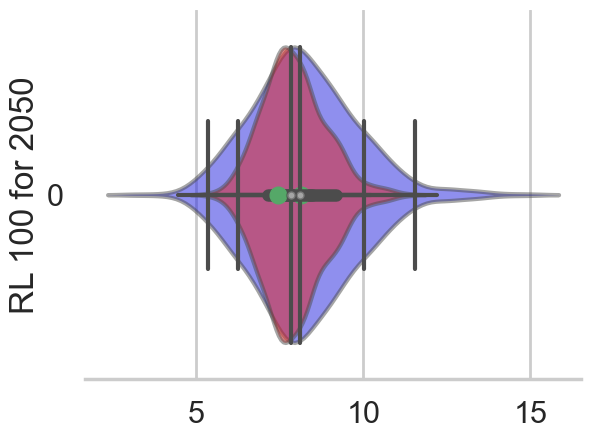

In [126]:
#RL2050
m='Multi_Synthesis'


fig = plt.figure()
ax=sns.violinplot(RL_2050,orient="h",color = "blue"  )
plt.setp(ax.collections, alpha=.3)
sns.boxplot(RL_2050, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(RL_2050_BE, 0,'go' )
ax.set_ylabel("RL " +str(T)+ " for " + str(T_RL))
#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()

ax=sns.violinplot(RL_2050_post,orient="h",color = "red"  )
plt.setp(ax.collections, alpha=.5)
sns.boxplot(RL_2050_post, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(RL_2050_BE_post, 0,'go' )

#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()

plt.savefig(os.path.join( pathOut ,dt_string+"_RL " +str(T)+ " for " + str(T_RL)+"_PostBayes.png"))
plt.show()

In [127]:
test={"Temperature":RL_2050_post+bias_multi, "Distribution":"Posterior"}
test2={"Temperature":RL_2050+bias_multi, "Distribution":"Prior"}
full_RL_2050=pd.concat([pd.DataFrame(data=test),pd.DataFrame(data=test2)],ignore_index=True)
full_RL_2050[" "] = ""
full_RL_2050

,Temperature,Distribution,
0,43.923920,Posterior,
1,47.864172,Posterior,
2,42.853121,Posterior,
3,44.052529,Posterior,
4,44.618319,Posterior,
...,...,...,...
1995,41.078448,Prior,
1996,49.474238,Prior,
1997,45.573074,Prior,
1998,43.537388,Prior,


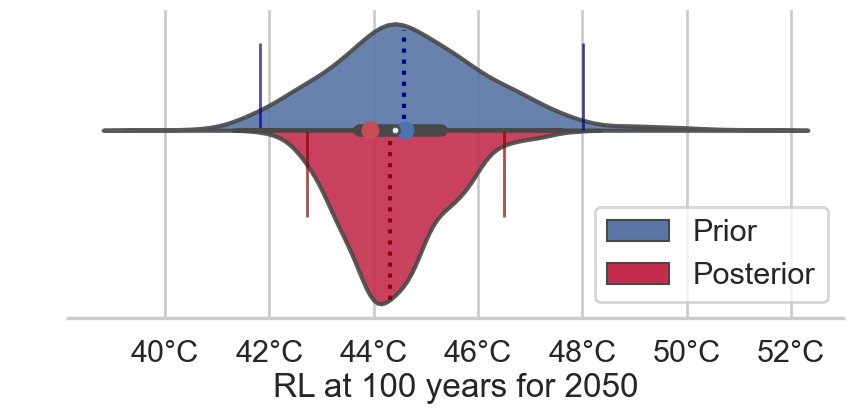

In [128]:
fig, ax = plt.subplots(figsize=(10,4))




ax=sns.violinplot(data=full_RL_2050, x="Temperature",y=' ',hue="Distribution",hue_order=["Prior","Posterior"] ,palette={"Prior": "b", "Posterior": "crimson"},
               split=True, orient="h",alpha=0.1)

plt.setp(ax.collections, alpha=.9)






ax.vlines(bias_multi+RL_2050_u,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2050_l,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2050_m,0,-0.23, colors='darkblue',linewidth=3,linestyle='dotted')
plt.plot(bias_multi+RL_2050_BE, 0,'bo' )


ax.vlines(bias_multi+RL_2050_m_post,0,0.4 , colors='darkred',linewidth=3,linestyle='dotted')
ax.vlines(bias_multi+RL_2050_l_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2050_u_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
plt.plot(bias_multi+RL_2050_BE_post, 0,'ro', linewidth=3 )

ax.set_xlabel("RL at " +str(T)+ " years for "+str(T_RL))
sns.despine(left=True,right=True)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0))
#plt.title("ER at " +str(T)+ " years for " + str(T1)+ "-"+str(T2))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°C'))
plt.legend(loc='lower right')
plt.savefig(os.path.join( pathOut ,dt_string+"_RL_Comp" +str(T)+"ans_for_"+str(T_RL)+"_PostBayes.png"))
plt.show()
#plt.clf()

## 2100

In [129]:
T_RL=2100
RL_2100_l,RL_2100_m,RL_2100_BE ,RL_2100_u,RL_2100=Find_RL_IC(m,params,T,T_RL,ci,xlen=1000)
RL_2100_l,RL_2100_m,RL_2100_BE ,RL_2100_u

(8.291545625194345, 13.390097946142568, 13.4497552689405, 20.56946821159818)

In [130]:
RL_2100_l_post,RL_2100_m_post,RL_2100_BE_post ,RL_2100_u_post,RL_2100_post=Find_RL_IC(m,paramsCXCB,T,T_RL,ci,xlen=1000)
RL_2100_l_post,RL_2100_m_post,RL_2100_BE_post ,RL_2100_u_post

(9.596990514545181, 13.78888915671142, 13.554109049595597, 20.39831942621107)

In [131]:
test={"Temperature":RL_2100_post+bias_multi, "Distribution":"Posterior"}
test2={"Temperature":RL_2100+bias_multi, "Distribution":"Prior"}
full_RL_2100=pd.concat([pd.DataFrame(data=test),pd.DataFrame(data=test2)],ignore_index=True)
full_RL_2100[" "] = ""
full_RL_2100

,Temperature,Distribution,
0,49.043500,Posterior,
1,60.506827,Posterior,
2,46.205728,Posterior,
3,49.399523,Posterior,
4,52.320975,Posterior,
...,...,...,...
1995,44.444008,Prior,
1996,57.045779,Prior,
1997,50.072277,Prior,
1998,46.918815,Prior,


In [132]:
m='Multi_Synthesis'

with open(os.path.join( pathOut ,dt_string+"_RL_" +str(T)+"ans_pour_"+str(T_RL)+"_PostBayes.txt"), 'w') as f:
    a="Anomaly: for Prior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(RL_2100_BE,2))+" with ic " + str(ci)+" at ["+str(round(RL_2100_l,2))+ ","+str(round(RL_2100_u,2))+"] with median at "+str(round(RL_2100_m,2))+"\n"
    print(a)
    f.write(a)
    a="Anomaly: for Posterior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(RL_2100_BE_post,2))+" with ic " + str(ci)+" at ["+str(round(RL_2100_l_post,2))+ ","+str(round(RL_2100_u_post,2))+"] with median at "+str(round(RL_2100_m_post,2))+"\n"
    print(a)
    f.write(a)
    a="Absolute: for Prior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(bias_multi+RL_2100_BE,2))+"°C with ic " + str(ci)+" at ["+str(round(bias_multi+RL_2100_l,2))+ ","+str(round(bias_multi+RL_2100_u,2))+"] with median at "+str(round(bias_multi+RL_2100_m,2)) +"\n"
    print(a)
    f.write(a)
    a="Absolute: for Posterior, RL " +str(T)+" years in "+str(T_RL) + " is " + str(round(bias_multi+RL_2100_BE_post,2))+"°C with ic " + str(ci)+" at ["+str(round(bias_multi+RL_2100_l_post,2))+ ","+str(round(bias_multi+RL_2100_u_post,2))+"] with median at "+str(round(bias_multi+RL_2100_m_post,2))+"\n"
    print(a)
    f.write(a)

Anomaly: for Prior, RL 100 years in 2100 is 13.45 with ic 0.05 at [8.29,20.57] with median at 13.39

Anomaly: for Posterior, RL 100 years in 2100 is 13.55 with ic 0.05 at [9.6,20.4] with median at 13.79

Absolute: for Prior, RL 100 years in 2100 is 49.93°C with ic 0.05 at [44.77,57.05] with median at 49.87

Absolute: for Posterior, RL 100 years in 2100 is 50.03°C with ic 0.05 at [46.07,56.87] with median at 50.27



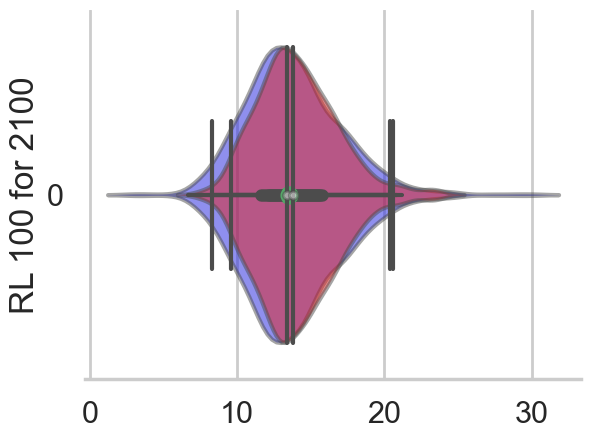

In [133]:
#RL2100
m='Multi_Synthesis'


fig = plt.figure()
ax=sns.violinplot(RL_2100,orient="h",color = "blue"  )
plt.setp(ax.collections, alpha=.3)
sns.boxplot(RL_2100, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(RL_2100_BE, 0,'go' )
ax.set_ylabel("RL " +str(T)+ " for " + str(T_RL))
#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()

ax=sns.violinplot(RL_2100_post,orient="h",color = "red"  )
plt.setp(ax.collections, alpha=.5)
sns.boxplot(RL_2100_post, showfliers=False, showbox=False, whis=[2.5,97.5], orient='h')
plt.plot(RL_2100_BE_post, 0,'go' )

#plt.title(" ".join(["Paramètres GEVt:"," ".join(m.split("_"))]))
#plt.legend()

plt.savefig(os.path.join( pathOut ,dt_string+"_RL " +str(T)+ " for " + str(T_RL)+"_PostBayes.png"))
plt.show()

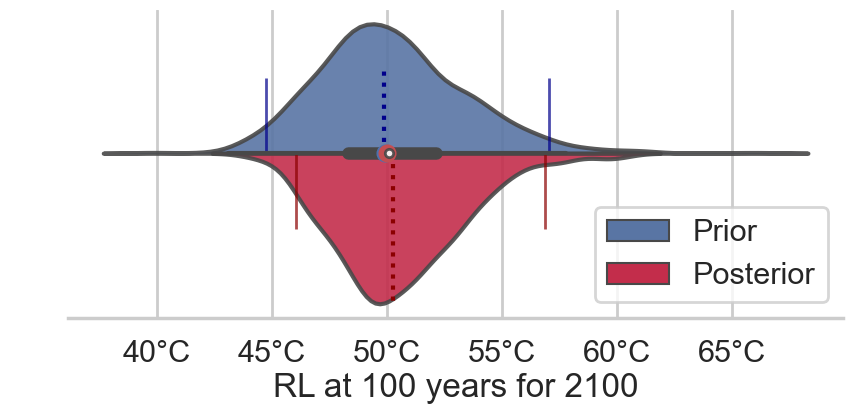

In [134]:
fig, ax = plt.subplots(figsize=(10,4))




ax=sns.violinplot(data=full_RL_2100, x="Temperature",y=' ',hue="Distribution",hue_order=["Prior","Posterior"] ,palette={"Prior": "b", "Posterior": "crimson"},
               split=True, orient="h",alpha=0.1)

plt.setp(ax.collections, alpha=.9)






ax.vlines(bias_multi+RL_2100_u,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2100_l,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2100_m,0,-0.23, colors='darkblue',linewidth=3,linestyle='dotted')
plt.plot(bias_multi+RL_2100_BE, 0,'bo' )


ax.vlines(bias_multi+RL_2100_m_post,0,0.4 , colors='darkred',linewidth=3,linestyle='dotted')
ax.vlines(bias_multi+RL_2100_l_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2100_u_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
plt.plot(bias_multi+RL_2100_BE_post, 0,'ro', linewidth=3 )

ax.set_xlabel("RL at " +str(T)+ " years for "+str(T_RL))
sns.despine(left=True,right=True)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0))
#plt.title("ER at " +str(T)+ " years for " + str(T1)+ "-"+str(T2))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°C'))
plt.legend(loc='lower right')
plt.savefig(os.path.join( pathOut ,dt_string+"_RL_Comp" +str(T)+"ans_for_"+str(T_RL)+"_PostBayes.png"))
plt.show()
#plt.clf()

## Comparaison

In [135]:
test={"Temperature":RL_2050_post+bias_multi, "Distribution":"Posterior"}
test2={"Temperature":RL_2050+bias_multi, "Distribution":"Prior"}
full_RL_2050=pd.concat([pd.DataFrame(data=test),pd.DataFrame(data=test2)],ignore_index=True)
full_RL_2050[" "] = ""
full_RL_2050

,Temperature,Distribution,
0,43.923920,Posterior,
1,47.864172,Posterior,
2,42.853121,Posterior,
3,44.052529,Posterior,
4,44.618319,Posterior,
...,...,...,...
1995,41.078448,Prior,
1996,49.474238,Prior,
1997,45.573074,Prior,
1998,43.537388,Prior,


In [136]:
test={"Temperature":RL_2100_post+bias_multi, "Distribution":"Posterior"}
test2={"Temperature":RL_2100+bias_multi, "Distribution":"Prior"}
full_RL_2100=pd.concat([pd.DataFrame(data=test),pd.DataFrame(data=test2)],ignore_index=True)
full_RL_2100[" "] = ""
full_RL_2100

,Temperature,Distribution,
0,49.043500,Posterior,
1,60.506827,Posterior,
2,46.205728,Posterior,
3,49.399523,Posterior,
4,52.320975,Posterior,
...,...,...,...
1995,44.444008,Prior,
1996,57.045779,Prior,
1997,50.072277,Prior,
1998,46.918815,Prior,


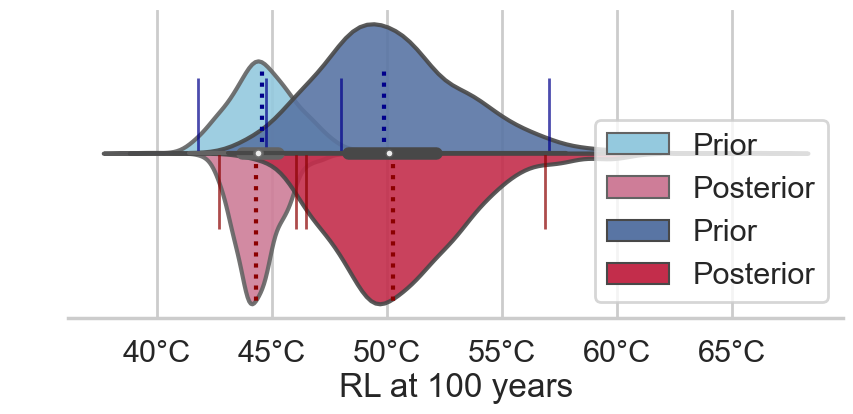

In [137]:
fig, ax = plt.subplots(figsize=(10,4))


ax=sns.violinplot(data=full_RL_2050, x="Temperature",y=' ',hue="Distribution",hue_order=["Prior","Posterior"] ,palette={"Prior": "skyblue", "Posterior": "palevioletred"},
               split=True, orient="h")
plt.setp(ax.collections, alpha=.3)

ax=sns.violinplot(data=full_RL_2100, x="Temperature",y=' ',hue="Distribution",hue_order=["Prior","Posterior"] ,palette={"Prior": "b", "Posterior": "crimson"},
               split=True, orient="h",alpha=0.1)

plt.setp(ax.collections, alpha=.9)

ax.vlines(bias_multi+RL_2050_u,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2050_l,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2050_m,0,-0.23, colors='darkblue',linewidth=3,linestyle='dotted')

ax.vlines(bias_multi+RL_2050_m_post,0,0.4 , colors='darkred',linewidth=3,linestyle='dotted')
ax.vlines(bias_multi+RL_2050_l_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2050_u_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)





ax.vlines(bias_multi+RL_2100_u,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2100_l,0,-0.2 , colors='darkblue',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2100_m,0,-0.23, colors='darkblue',linewidth=3,linestyle='dotted')

ax.vlines(bias_multi+RL_2100_m_post,0,0.4 , colors='darkred',linewidth=3,linestyle='dotted')
ax.vlines(bias_multi+RL_2100_l_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)
ax.vlines(bias_multi+RL_2100_u_post,0,0.2 , colors='darkred',alpha=0.7,linewidth=2)


ax.set_xlabel("RL at " +str(T)+ " years")
sns.despine(left=True,right=True)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0))
#plt.title("ER at " +str(T)+ " years for " + str(T1)+ "-"+str(T2))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°C'))
plt.legend(loc='lower right')
plt.savefig(os.path.join( pathOut ,dt_string+"_RL_Comp" +str(T)+"ans_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))
plt.show()
#plt.clf()

## Evolution Temp (Posterior)

In [138]:
#time_future=time[-51::]
time_future=time

In [139]:
RL_t_BE=np.zeros( len(time_future))
RL_t_l=np.zeros( len(time_future))
RL_t_m=np.zeros( len(time_future))
RL_t_u=np.zeros( len(time_future))

for i in range(len(time_future)):
    T_RL=time_future[i]
    print(T_RL)
    RL_2100_l,RL_2100_m,RL_2100_BE ,RL_2100_u,RL_2100=Find_RL_IC(m,paramsCXCB,T,T_RL,ci,xlen=1000)
    RL_t_l[i],RL_t_m[i],RL_t_BE[i],RL_t_u[i]=RL_2100_l,RL_2100_m,RL_2100_BE ,RL_2100_u
    
RL_t_m

1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049


array([ 2.36012118,  2.36574041,  2.37770304,  2.39191724,  2.3944489 ,
        2.39242822,  2.2661316 ,  2.1116129 ,  2.09068237,  2.13181286,
        2.18319819,  2.23859865,  2.24523845,  2.26102257,  2.28737492,
        2.32078777,  2.34770214,  2.37215219,  2.39109386,  2.40729593,
        2.42039362,  2.43910591,  2.44746244,  2.44979073,  2.4552654 ,
        2.46845334,  2.45634612,  2.45518929,  2.45638474,  2.46248027,
        2.47417661,  2.49060373,  2.5004756 ,  2.36029869,  1.96070312,
        1.9060295 ,  1.95029945,  1.97253602,  2.03926987,  2.07039838,
        2.06289014,  2.08769247,  2.13790008,  2.22592132,  2.31041559,
        2.38664123,  2.38578758,  2.3879688 ,  2.40472379,  2.44037936,
        2.47834761,  2.51459828,  2.47676556,  2.30013265,  2.29326339,
        2.34338399,  2.40107803,  2.43951912,  2.47039575,  2.51590468,
        2.55501864,  2.586031  ,  2.55635782,  2.51298678,  2.53485932,
        2.57379018,  2.61869851,  2.65558068,  2.685455  ,  2.71

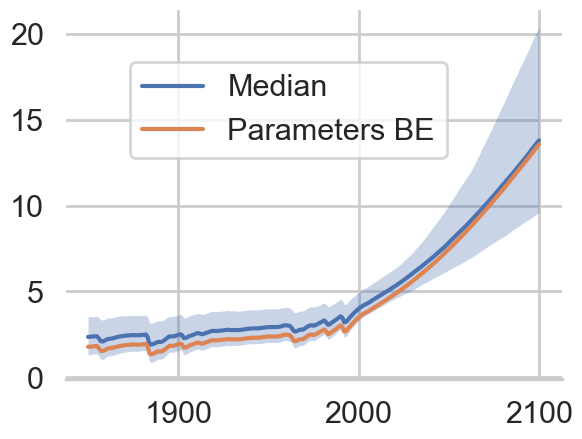

In [140]:
fig, ax = plt.subplots()
ax.plot(time_future,RL_t_m, label="Median" )
ax.plot(time_future,RL_t_BE, label="Parameters BE" )
plt.fill_between(time_future, RL_t_l, RL_t_u,linewidth=0,alpha=0.3)
plt.legend()
ax.legend(bbox_to_anchor=(0.8, 0.9))
plt.savefig(os.path.join( pathOut ,dt_string+"_RL_" +str(T)+"ans_evolution_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))
plt.show()

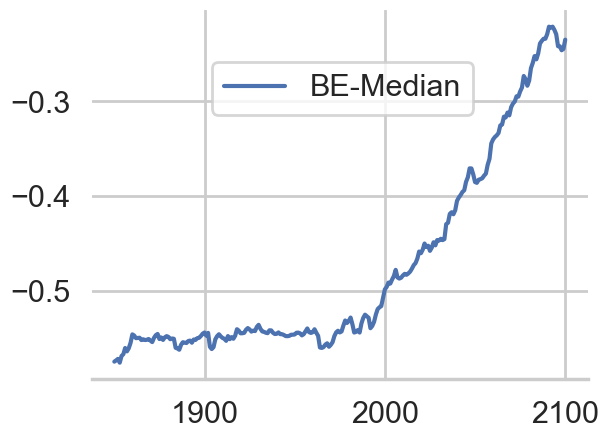

In [141]:
fig, ax = plt.subplots()
ax.plot(time_future,RL_t_BE-RL_t_m, label="BE-Median" )



z = np.polyfit(time_future,RL_t_BE-RL_t_m, 1)
p = np.poly1d(z)
#plt.plot(time_future,p(time_future),"--",label=r"Tendance " +str(np.round(z[0]*10,2))+"°C par décade")

X_t=climCXCB.X.loc[:,'BE','F'].loc[:,'Multi_Synthesis'].values
z = np.polyfit(X_t,RL_t_BE-RL_t_m, 1)
p = np.poly1d(z)
#plt.plot(time_future,p(X_t),"--",label=r"Tendance " +str(np.round(z[0]*10,2))+"°C par décade")


plt.legend()
ax.legend(bbox_to_anchor=(0.8, 0.9))
plt.savefig(os.path.join( pathOut ,dt_string+"_Comp_BE_Med_RL_" +str(T)+"ans_evolution_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))
plt.show()

array([-3.72548513e-04,  5.03793625e-02, -4.99341239e-01])

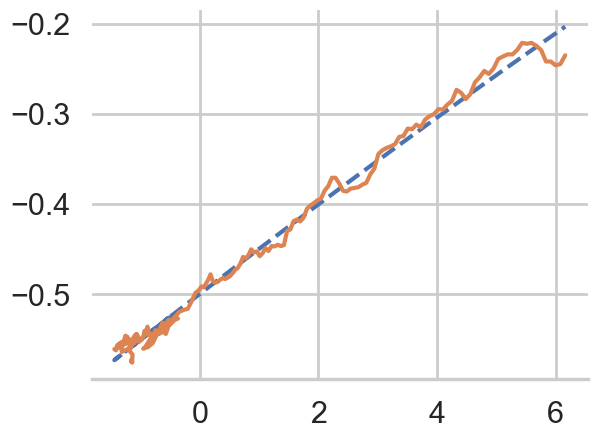

In [142]:
z = np.polyfit(X_t,RL_t_BE-RL_t_m, 2)
p = np.poly1d(z)
plt.plot(X_t,p(X_t),"--",label=r"Tendance " +str(np.round(z[0]*10,2))+"°C par décade")
plt.plot(X_t,RL_t_BE-RL_t_m)
z

In [143]:
X_t=climCXCB.X.loc[:,'BE','F'].loc[:,'Multi_Synthesis'].values

In [144]:
T

100

## Risque de dépassement


In [145]:
Qm_EQR, EQR

(11.98188113023522, 0.598956006466161)

In [146]:
bias_multi

36.47666667

In [147]:
Q_100=[sc.genextreme.ppf((1-1/T), -qparamsX.loc["BE",time,"F",qparamsX.param[2],m][i], qparamsX.loc["BE",time,"F",qparamsX.param[0],m][i],qparamsX.loc["BE",time,"F",qparamsX.param[1],m][i]) for i in list(range(0,fin-deb))]
#Q_100

In [148]:

Q_100[-1]+bias_multi,Q_100[-51]+bias_multi

(50.09592821220829, 44.30643841543973)

In [149]:
Q_100[-1],Q_100[-51]

(13.619261542208289, 7.829771745439729)

In [150]:
proba_z_2100=proba_period_mult(Q_100[-1],paramsCXCB[:,:1,:,:,:].loc[:,'BE','F',:,m],T1,T2,1)
proba_z_2100,Q_100[-1]

(array([0.96063577]), 13.619261542208289)

In [151]:
EQR, Qm_EQR

(0.598956006466161, 11.98188113023522)

In [152]:
proba_z_2050=proba_period_mult(Q_100[-51],paramsCXCB[:,:1,:,:,:].loc[:,'BE','F',:,m],T1,T2,1)
proba_z_2050,Q_100[-51]

(array([9.83536401e-08]), 7.829771745439729)

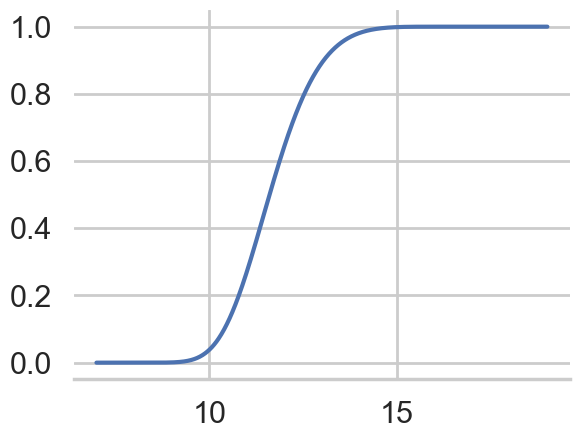

In [153]:
x = np.linspace(7,19, 1000)
test_val=[proba_period_mult(i,paramsCXCB[:,:1,:,:,:].loc[:,'BE','F',:,m],T1,T2,1) for i in x]
plt.plot(x,test_val)

plt.show()

In [154]:
test_val_dep= [1-x for x in test_val]

In [155]:
#EDF
edf_val=48-bias_multi
proba_edf=proba_period_mult(edf_val,paramsCXCB[:,:1,:,:,:].loc[:,'BE','F',:,m],T1,T2,1)
proba_edf,edf_val

(array([0.46765907]), 11.52333333)

In [156]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

custom_params = {"axes.spines.bottom": True,"axes.spines.right": False,"axes.spines.left": False, "axes.spines.top":False}
sns.set_theme(style="white",rc=custom_params)
sns.set_context("poster")

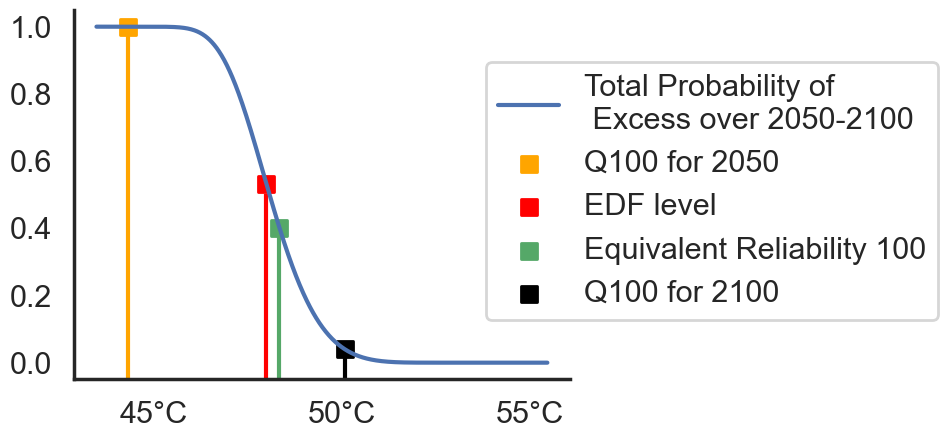

<Figure size 640x480 with 0 Axes>

In [157]:
fig, ax = plt.subplots()


ax.plot(x+bias_multi,test_val_dep, label="Total Probability of \n Excess over 2050-2100" )
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0))
#ax.vlines(max(borne_max_t),0, 1,transform=ax.get_xaxis_transform(), colors='r',label="Borne Max en 2100")






ax.scatter(Q_100[-51]+bias_multi,1-proba_z_2050, marker = "s", label='Q'+str(T)+' for 2050',color="orange")

ax.vlines(Q_100[-51]+bias_multi,0,1-proba_z_2050-0.03,transform=ax.get_xaxis_transform(), colors='orange')

ax.scatter(edf_val+bias_multi,1-proba_edf, marker = "s", label='EDF level',color="Red")

ax.vlines(edf_val+bias_multi,0,1-proba_edf-0.03,transform=ax.get_xaxis_transform(), colors='Red')
ax.scatter(EQR_BE_post+bias_multi,1-EQR, marker = "s", label='Equivalent Reliability '+str(T),color='g')
ax.vlines(EQR_BE_post+bias_multi,0, 1-EQR+.02,transform=ax.get_xaxis_transform(), colors='g')


ax.scatter(Q_100[-1]+bias_multi,1-proba_z_2100, marker = "s", label='Q'+str(T)+' for 2100',color="black")
ax.vlines(Q_100[-1]+bias_multi,0, 1-proba_z_2100+0.02,transform=ax.get_xaxis_transform(), colors='black')
#ax.hlines( 1-proba_z_2100,35,Q_100[-1]+bias_multi,transform=ax.get_yaxis_transform(), colors='black')


plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°C'))
#plt.title("Probabilité de non dépassement (Totale) sur 2050-2100")
sns.despine(right=True)

plt.legend()
ax.legend(bbox_to_anchor=(0.8, 0.9))
plt.savefig(os.path.join( pathOut ,dt_string+"_Depassement_BE_" +str(T)+"ans_evolution_entre_"+str(T1)+"_et_"+str(T2)+"_PostBayes.png"))

plt.show()
plt.clf()